In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

Losowanie elementów na podstawie zadanych parametrów

In [79]:
d = {'x':[4,0],'y':[0,4]}
S = pd.DataFrame(d)    #macierz kowariancji
mt1 = np.array([-3,-1]) #średnie klas
mt2 = np.array([2,2])
n1 = 40                #liczebność klas
n2 = 30
n = n1+n2
X1 = np.random.multivariate_normal(mt1, S, n1) #losowanie obserwacji w klasach na podstawie wcześniejszych parametrów
X2 = np.random.multivariate_normal(mt2, S, n2)

Wykreślenie elementów klas

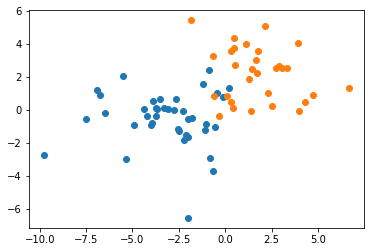

In [94]:
fig, ax = plt.subplots()
ax.plot(X1[:,0], X1[:,1], 'o', label = 'Class 1')
ax.plot(X2[:,0], X2[:,1], 'o', label = 'Class 2')

Sklejenie współrzędnych wylosowanych punktów i dodanie kolumn z info o klasach

In [95]:
X1_data = pd.DataFrame(X1, columns = ["x", "y"])
X1_data["class"] = [1] * len(X1)
X2_data = pd.DataFrame(X2, columns = ["x", "y"])
X2_data["class"] = [2] * len(X2)
XX = X1_data.append(X2_data, sort = False)

Tworzenie siatki współrzędnych (odpowiednik expand.grid() z R)

In [96]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
xx = np.array(np.meshgrid(x, y)).reshape(2, len(x)*len(y)).T
df = pd.DataFrame(xx, columns = ["x","y"])

Utworzenie klasyfikatora i wykreślenie rezultatu dyskryminacji przy użyciu funkcji GaussianNB

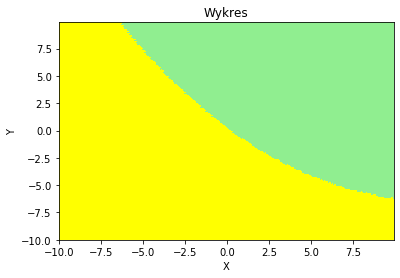

In [97]:
NB = GaussianNB()
predictions = NB.fit(XX[["x","y"]], XX["class"]).predict(df).reshape(len(x),len(y))
fig, ax = plt.subplots()
ax.contourf(x,y, predictions, colors = ["yellow", "lightgreen"])
ax.set_title("Wykres")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show(fig)

Wyznaczenie parametrów klas na podstawie danych

In [98]:
pi1 = n1/n   #prawdopodobieństwa a priori
pi2 = n2/n

Se1 = np.cov(X1_data[["x", "y"]], rowvar = False)   #macierze kowariancji
Se2 = np.cov(X2_data[["x", "y"]], rowvar = False)

me1 = np.array([np.mean(X1_data["x"]),np.mean(X1_data["y"])])   #średnie klas
me2 = np.array([np.mean(X2_data["x"]),np.mean(X2_data["y"])])

Utworzenie klasyfikatora i wykreślenie rezultatu dyskryminacji na podstawie prawdopodobieństw a posteriori

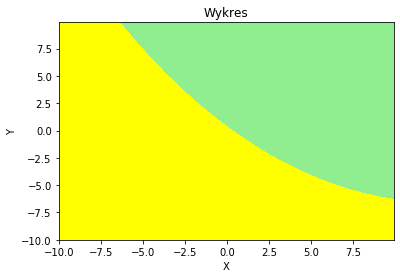

In [99]:
def nbayes(X, m1, m2, S1, S2, pi1, pi2):
    return(np.log(pi1 * norm.pdf(X["x"], m1[0], np.sqrt(S1[0, 0])) * norm.pdf(X["y"], m1[1], np.sqrt(S1[1, 1])) / (pi2 * norm.pdf(X["x"], m2[0], np.sqrt(S2[0, 0])) * norm.pdf(X["y"], m2[1], np.sqrt(S2[1, 1])))))

mat = np.matrix(nbayes(df,me1,me2,Se1,Se2,pi1,pi2)).reshape(len(x),len(y))

fig, ax = plt.subplots()
ax.contourf(x,y, mat, 0, colors = ["lightgreen", "yellow"])
ax.set_title("Wykres")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show(fig)